# IPCC AR6 Sub-regions with topography
This code displays the global topography map extracted from GTOPO 30 over sub-regions of the global land area as defined in the Sixth Assessment Report (AR6) of the IPCC according to Iturbide et al. (2020) at https://doi.org/10.5194/essd-12-2959-2020

In [37]:
# Import modules
%matplotlib inline
%run /g/data/w40/pn3424/2024/Lisa/Python/Code/Master_functions_Lisa.ipynb
import xarray as xr
import pymannkendall as mk
import fnmatch
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mticker
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

Shape of p-values array: (10, 10)


## Define region of interest, season 

In [38]:
# Define region of interest (lat and lon boundaries for all of big region of interest e.g. Monsoon Asia, Australia, Africa... )
lat_slice = slice(-60,90)
lon_slice = slice(-180,180)

# Define temporal scale for SPI variable (1 for 3-months, 2 for 6-months, 3 for 12-months); use "None" if not using the SPI variable
iscale = None

# Define season as a list of month numbers. If not wanting a seasonal breakdown, use None.
# Suggestions: Wet 6-month: [10,11,12,1,2,3]; Dry 6-month: [4,5,6,7,8,9]; Wet 3-month: [12,1,2]; Dry 3-month: [6,7,8]
season = None
season_name = 'Annual'

# Define a mask for regions

mask_ds = xr.open_dataset('/g/data/w40/pn3424/2024/Lisa/GLDASp5_elevation_10d.nc4')

variable='elevation'

land_mask = mask_ds.GLDAS_elevation.sel(lat=lat_slice, lon=lon_slice)


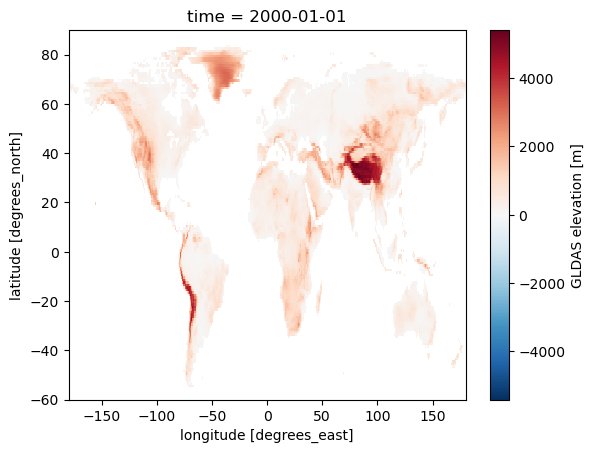

In [39]:
land_mask.plot()

In [40]:
##extract region from regionmask
import regionmask
ipcc_mask_ds=xr.open_dataset("/g/data/w40/pn3424/2024/Lisa/mask/land_sea_mask_combined_1degree.nc")
ipcc_mask=regionmask.defined_regions.ar6.land.mask(ipcc_mask_ds)

In [41]:
##define IPCC Region according to 
ipcc_subregions = {"NWN": 1, "NEN": 2, "WNA": 3, "CNA": 4, "ENA": 5, "NCA": 6, "SAH": 20,"WAF": 21,
    "CAF": 22, "NEAF": 23, "SEAF": 24, "ESAF": 26, "WSAF":25, "MDG": 27, "EAU": 41,"CAU": 40,"SAU": 42, 
    "NAU": 39, "SEA": 38, "EAS": 35, "ECA": 33, "TIB": 34, "SAS": 37, "NWS": 9, "NSA": 10, "SAM": 12, "NES": 11, 
    "SWS": 13,  "SES": 14, "SSA":15, "NEU": 16, "WCE": 17, "GIC": 0, "EEU": 18, "WSB": 29, "ESB":30, 
    "RFE": 31, "RAR": 28, "WCA": 32, "ARP": 36, "NZ": 43, "SCA": 7, "CAR":8
    }
    

In [42]:
ar6_land=regionmask.defined_regions.ar6.land['NWS', 'NSA','SAM','NES','SES','SSA','SWS',  'NWN', 'NEN',"WNA",  "CNA", "ENA", "NCA", 
"SAH", "WAF", "CAF", "NEAF", "SEAF", "ESAF", "WSAF","MDG", "EAU","CAU","SAU", "NAU", "SEA", "EAS", "ECA", "TIB", "SAS",'MED',  "NEU",
    "WCE", "GIC", "EEU", "WSB",  "ESB", "RFE", "RAR",  "WCA", "ARP", "NZ", "SCA", "CAR"]

In [43]:
##define region with regional insitu dataset (display as red dashed line)
ar6_land_NH=regionmask.defined_regions.ar6.land['NWN', 'NEN',"WNA",  "CNA", "ENA", "NCA", "EAU","CAU","SAU", "NAU", "SEA", "EAS", "ECA", "TIB", "SAS",'MED', 'WCE', "NEU", "NZ"]

In [44]:
## region without a regional insitu dataset (display as a black dashed line)
ar6_land_SH=regionmask.defined_regions.ar6.land['NWS', 'NSA','SAM','NES','SES','SSA','SWS',"SAH", "WAF", "CAF", "NEAF", "SEAF", "ESAF", "WSAF","MDG","GIC", "EEU", "WSB",  "ESB", "RFE", "RAR",  "WCA", "ARP", "SCA", "CAR"]

## Plotting

In [45]:
#extent=[lonmin1, lonmax1, latmin1, latmax1]
extent = [-180, 180, -60, 90]
proj = ccrs.PlateCarree()

# Lat/Lon values to show for axis labels
lon_ticks = [ -120, -60, 0, 60, 120]
lat_ticks = [-30, 0, 30, 60]

# Define colormap
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors
cmap = cmap=plt.get_cmap('gist_earth',17)
norm = colors.BoundaryNorm([0, 100, 200, 300, 500, 700, 900, 1000, 1200, 1500, 1800, 2000, 2500, 3000, 3500, 4000, 5000], 16)

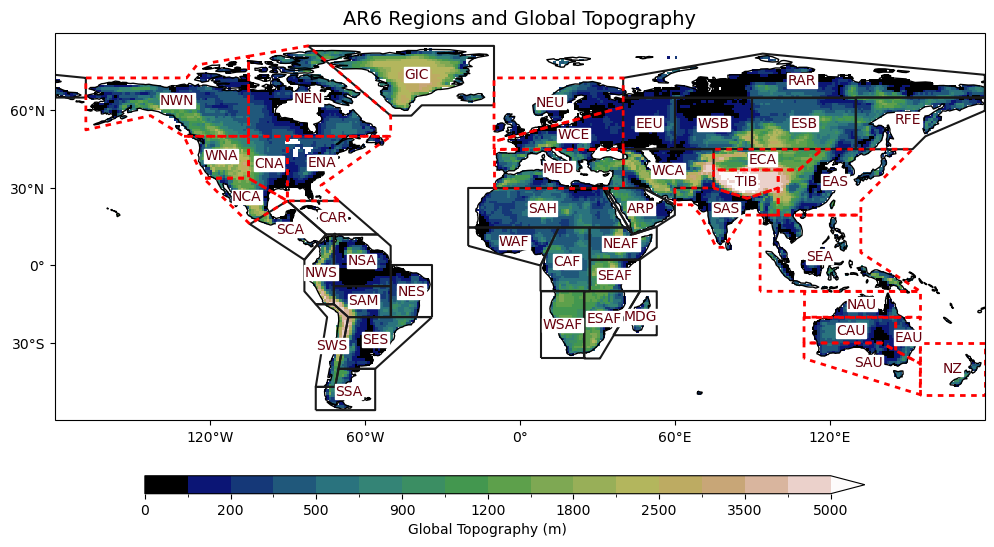

In [46]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from cartopy.mpl.ticker import LatitudeFormatter, LongitudeFormatter
from matplotlib.collections import LineCollection
import regionmask

# Define AR6 regions for NH
#ar6_land_NH = regionmask.defined_regions.ar6.land[
#    ['NWN', 'NEN', 'WNA', 'CNA', 'ENA', 'NCA', 'EAU', 'CAU', 'SAU', 'NAU', 
#     'ECA', 'TIB', 'EAS', 'SAS', 'SEA', 'MED', 'WCE', 'NEU', 'NZ']
#]

# Create the figure and axis
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot the land mask
mymap = land_mask.plot(ax=ax, cmap=cmap, norm=norm, add_colorbar=False)
ax.coastlines()
text_kws = dict(color="#67000d", fontsize=10, bbox=dict(pad=0.2, color='w'))
ar6_land_NH.plot_regions(ax=ax, label='abbrev', text_kws=text_kws, line_kws=dict(linewidth=0))
ar6_land_SH.plot_regions(ax=ax, label='abbrev', text_kws=text_kws)

# Function to plot region outlines
def plot_region_outlines(ax, region_polygons, linestyle, color, linewidth):
    """Plot region outlines from regionmask polygons."""
    for polygon in region_polygons:
        if polygon is not None:  # Some regions might have no polygon
            line = LineCollection(
                [list(polygon.exterior.coords)],
                linestyle=linestyle,
                colors=color,
                linewidth=linewidth,
                transform=ccrs.PlateCarree()
            )
            ax.add_collection(line)

# Plot the AR6 regions for NH
plot_region_outlines(ax, ar6_land_NH.polygons, linestyle=(0, (2, 2)), color='red', linewidth=2)  # Dashed red lines
#plot_region_outlines(ax, ar6_land_SH.polygons, linestyle=(0, (2, 2)), color='black', linewidth=2)  # Dashed red lines

# Label the AR6 regions


# Set the title
ax.set_title('AR6 Regions and Global Topography', fontsize=14)

# Set latitude and longitude tick formatters
lat_formatter = LatitudeFormatter()
lon_formatter = LongitudeFormatter(zero_direction_label=False)
ax.set_xticks(lon_ticks, crs=ccrs.PlateCarree())
ax.set_yticks(lat_ticks, crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

# Remove axis labels
ax.set_xlabel(None)
ax.set_ylabel(None)

# Add the colorbar
cax = fig.add_axes([0.2, 0.05, 0.6, 0.03])
cb = fig.colorbar(mymap, cax=cax, orientation="horizontal", extend='max')
cb.set_label("Global Topography (m)", size='medium')

# Save the figure
plt.savefig("/g/data/w40/pn3424/2024/Lisa/Figure/Fig1_regions_topography.png", dpi=300, bbox_inches='tight')
